<a href="https://colab.research.google.com/github/phk16/jupyterNotebooks/blob/main/dvi_a2_ps1_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




##  Download and Prep the Data: 1 Marks

<h4>Import the libraries needed</h4>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#05f28f", "figure.facecolor":"#c5f0de",
            "axes.grid":True, "grid.color":"black", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#65cee8", "legend.frameon": True, "legend.edgecolor":"#27a1bf"})
sns.set_context("poster",font_scale = 0.7)

palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7", "#f27a02","#97f7f6","#150647"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]
palette_cmap_n = np.array(["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"])
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': 'background-color: #f0f099; color: black'
#     'props': [('background-color', '#ffffb3'; 'color')].
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: black; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #c5f0de; color: black;'
}

table_styles = [cell_hover, index_names, headers]
set_properties = {"background-color": "#05f28f","color":"black","border": "1.3px solid black"}

<h4> Load data and store in dataframe </h4>

In [ ]:
%%time
pd_df=pd.read_csv('dvi-a2-ps1-data.csv', na_values='nan')

CPU times: user 285 ms, sys: 30.8 ms, total: 316 ms
Wall time: 317 ms


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [ ]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
print(pd_df.transpose().head(10))

                                                      0      \
Unnamed: 0                                                0   
ID                                                   158023   
Name                                               L. Messi   
Age                                                      31   
Photo        https://cdn.sofifa.org/players/4/19/158023.png   
Nationality                                       Argentina   
Flag                    https://cdn.sofifa.org/flags/52.png   
Overall                                                  94   
Potential                                                94   
Club                                           FC Barcelona   

                                                     1      \
Unnamed: 0                                               1   
ID                                                   20801   
Name                                     Cristiano Ronaldo   
Age                                                     33

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Fill the missing value for the continous variables with Mean(average) for proper data visualization.
<br><br>
    Preprocess height - convert data in  format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical.
<br><br>
    Preprocess weight - convert data in  format xxlbs to xx Remove "nan" with Mode and convert the column to numerical.
<h4>Do Univariate anlaysis for outliers detection for height and weight.
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [ ]:
def dataType(col):
  list1 = col.index
  list2=[]
  for x in list1:
    temp =pd_df[x].dtype
    list2.append(temp)
  list3 = pd.Series(list2, index=list1)
  return list3

In [ ]:
missing_values = pd_df.isnull().sum().sort_values(ascending = False)
dtype7 = dataType(missing_values)
percentage_missing_values = (missing_values/len(pd_df))*100
pd.DataFrame(pd.concat([missing_values, percentage_missing_values, dtype7], axis = 1, keys= ['Missing values', '% Missing', 'type'])).style.set_table_styles(table_styles).set_properties(**set_properties)

,Missing values,% Missing,type
Loaned From,16943,93.057615,object
LWB,2085,11.451639,object
LCM,2085,11.451639,object
RS,2085,11.451639,object
LW,2085,11.451639,object
LF,2085,11.451639,object
CF,2085,11.451639,object
RF,2085,11.451639,object
RW,2085,11.451639,object
LAM,2085,11.451639,object


In [ ]:
pd_df['Height'] =  pd_df['Height'].apply(lambda x: str(x).replace("\'", "."))
pd_df['Height'] =  pd_df['Height'].fillna(pd_df['Height'].mode()[0])
temp_mode = pd_df['Height'].mode()[0]
pd_df['Height'] =  pd_df['Height'].apply(lambda x: temp_mode if x == 'nan' else x )
pd_df['Height'] = pd_df['Height'].apply(pd.to_numeric)

In [ ]:
pd_df['Weight'] =  pd_df['Weight'].apply(lambda x: str(x).replace("lbs", ""))
pd_df['Weight'] =  pd_df['Weight'].fillna(pd_df['Weight'].mode()[0])
temp_mode = pd_df['Weight'].mode()[0]
pd_df['Weight'] =  pd_df['Weight'].apply(lambda x: temp_mode if x == 'nan' else x )
pd_df['Weight'] = pd_df['Weight'].apply(pd.to_numeric)

In [ ]:
pd_df_null = pd_df.fillna(pd_df.mean())

In [ ]:
missing_values = pd_df_null.isnull().sum().sort_values(ascending = False)
dtype7 = dataType(missing_values)
percentage_missing_values = (missing_values/len(pd_df))*100
pd.DataFrame(pd.concat([missing_values, percentage_missing_values, dtype7], axis = 1, keys= ['Missing values', '% Missing', 'type'])).style.set_table_styles(table_styles).set_properties(**set_properties)

,Missing values,% Missing,type
Loaned From,16943,93.057615,object
LWB,2085,11.451639,object
LCM,2085,11.451639,object
RS,2085,11.451639,object
LW,2085,11.451639,object
LF,2085,11.451639,object
CF,2085,11.451639,object
RF,2085,11.451639,object
RW,2085,11.451639,object
LAM,2085,11.451639,object


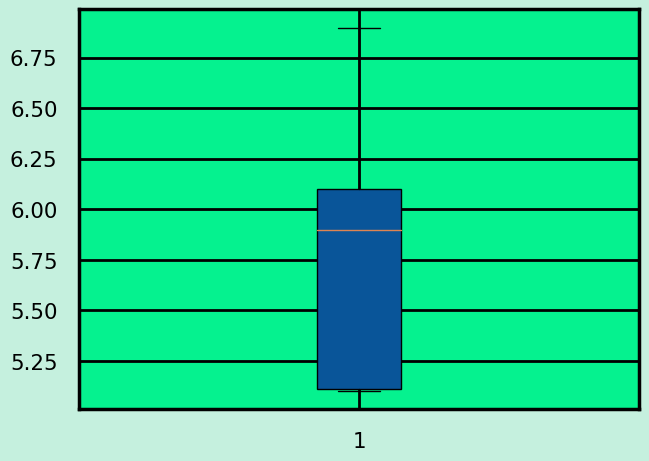

In [ ]:

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

bploting=ax1.boxplot(pd_df_null['Height'],patch_artist=True, boxprops=dict(facecolor="#095599"))
top = bploting['caps'][1].get_data()[1][0]
bot = bploting['caps'][0].get_data()[1][0]
points = bploting['fliers'][0].get_data()[1]
top_points = [ point for point in points if point> top]
bottom_points = [point for point in points if point< bot]
ax1.plot(np.ones(len(top_points)), top_points, "o", color="#ff4040", markersize=3)
ax1.plot(np.ones(len(bottom_points)), bottom_points, "o", color="#ff4040", markersize=3)
fig.subplots_adjust(bottom=0.2, left=0.3, right=1, top=1)

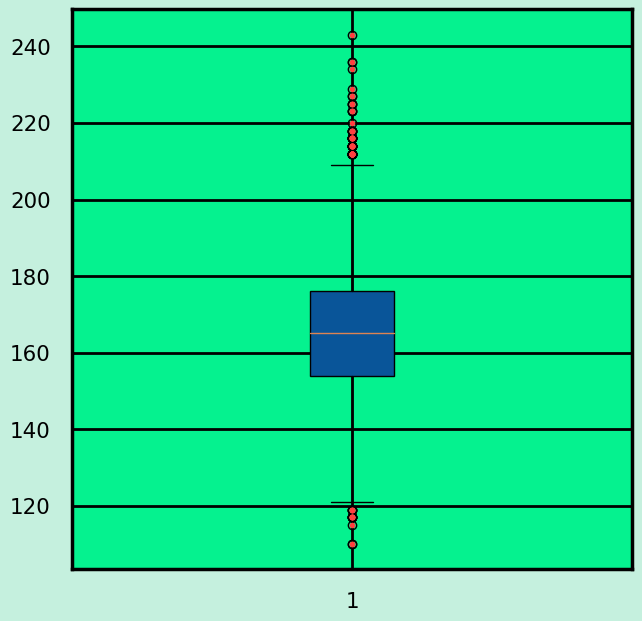

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

bploting=ax1.boxplot(pd_df_null['Weight'],patch_artist=True, boxprops=dict(facecolor="#095599"))
top = bploting['caps'][1].get_data()[1][0]
bot = bploting['caps'][0].get_data()[1][0]
points = bploting['fliers'][0].get_data()[1]
top_points = [ point for point in points if point> top]
bottom_points = [point for point in points if point< bot]
ax1.plot(np.ones(len(top_points)), top_points, "o", color="#ff4040", markersize=3)
ax1.plot(np.ones(len(bottom_points)), bottom_points, "o", color="#ff4040", markersize=3)
fig.subplots_adjust(bottom=0.2, left=0.7, right=1.5, top=1)

<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <p> The height values range between 5.1 to 6.7. The weight ranges from 110 to 243. Heights is ditributed normally and don't have any outliers. Weight on the other hand have outliers such as 110 to 119 and 212 to 243.  </p>
    <li>The reason for selecting the chart type you did.</li>
    <p> we were asked to plot chart to find the outliers. Box plot is helps us doing it. We added the colors to outliers to be visually different</p>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    1) used color to identify the outliers</br>
    2) used a visualy appealing color for box to show maximum range of values
    <li>Mention the gestalt principles used.(atleast 2)</li>
    1) closure - It gives the closure of values with range</br>
    2) simplicity - we used to simple plot to better covey our information
</ol>



### Question 2
<h4>Do Bi-Variate anlaysis for outliers detection for height and weight
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

Text(0, 0.5, 'Weight')

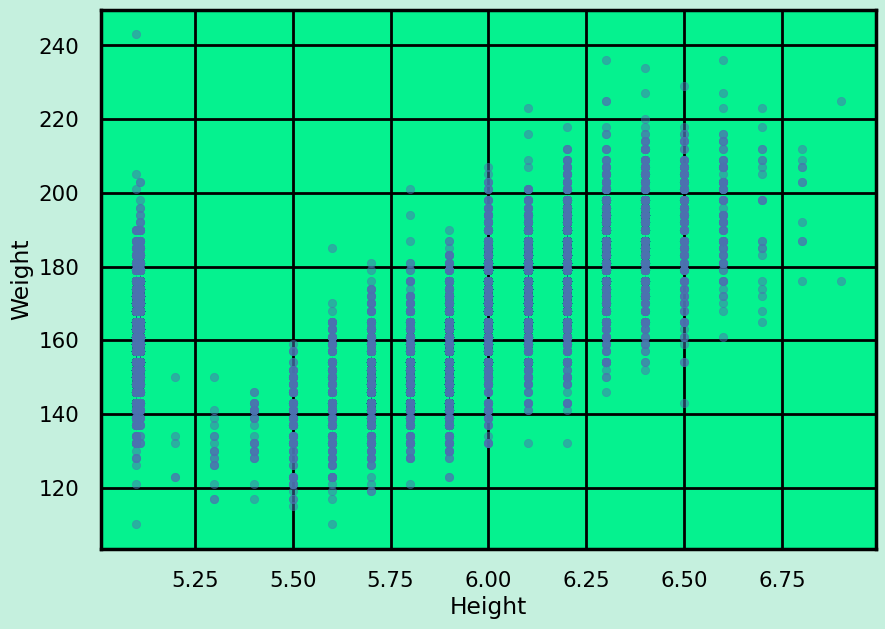

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

bplotting = ax1.scatter(x=pd_df_null.Height, y=pd_df_null.Weight, alpha=0.5, linewidths=0.5, marker=".")
plt.xlabel('Height')
plt.ylabel('Weight')

<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <p> The tall people, weighs more. We can see a mismatch in this where people with 5.1 have abnormally high weights. This may be due to incorrectly loaded. </p>
    <li>The reason for selecting the chart type you did</li>
    <p> We used to scatter plot to plot the height and weight. The scatter plot is used to plot between two continous patrameters.</p>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    1) The area where there are too many points ahve darker shade and the area where points are far way have lighter shade</br>
    2) used a visualy appealing color and marker for scatter plot to show maximum range of values
    <li>Mention the gestalt principles used.(atleast 2)</li>
    1) connectedness - It gives the connection between the height and weight</br>
    2) proximity - The weight for every player is at some range every height
</ol>

### Question 3
<h4>What kind of co-relation exists between Age and Overall.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [ ]:
pd_df_null[['Age', 'Overall']].corr()

,Age,Overall
Age,1.00000,0.45235
Overall,0.45235,1.00000


Text(0, 0.5, 'Overall')

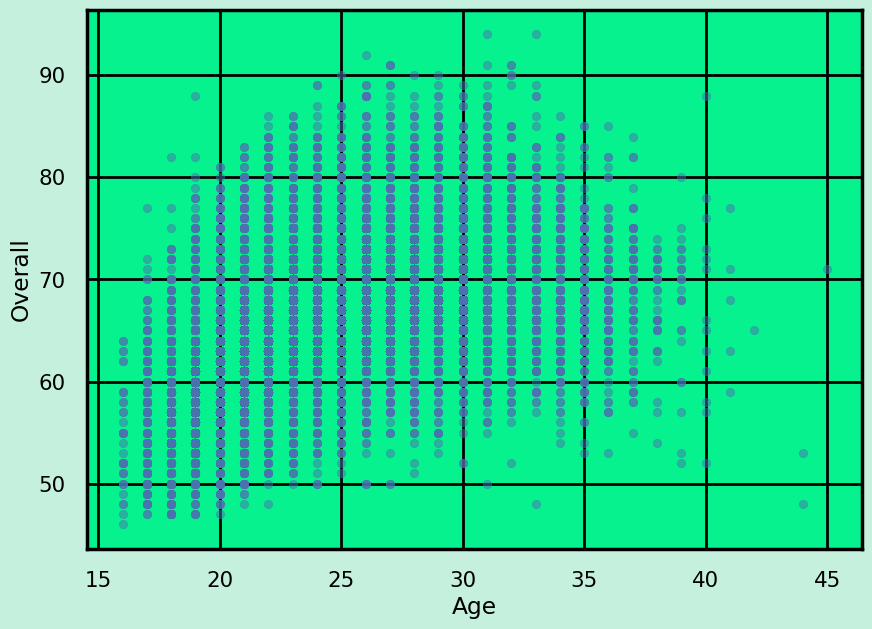

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

bplotting = ax1.scatter(x=pd_df_null.Age, y=pd_df_null.Overall, alpha=0.5, linewidths=0.5, marker=".")
plt.xlabel('Age')
plt.ylabel('Overall')

<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <p>Players below 20 have the lowest ratings and between 25 to 35 have the highest rating. Players with 31 and 33 have the highest ratings. Most players are rated between 75 to 85.</p>
    <li>The reason for selecting the chart type you did.</li>
    <p>Scatter plot is used to plot between 2 indendent continous values. So we used scatter plot to plot the values. </p>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    1) The area where there are too many points ahve darker shade and the area where points are far way have lighter shade</br>
    2) used a visualy appealing color and marker for scatter plot to show maximum range of values
    <li>Mention the gestalt principles used.(atleast 2)</li>
    1) connectedness - It gives the connection between the Age and rating</br>
    2) proximity - The rating of every player for particular age are within some range
</ol>

  ### Question 4
<h4>What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [ ]:
pd_df_null['Potential'].unique()

array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62,
       61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 48])

In [ ]:
pd_df_null['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

Text(0, 0.5, 'Overall')

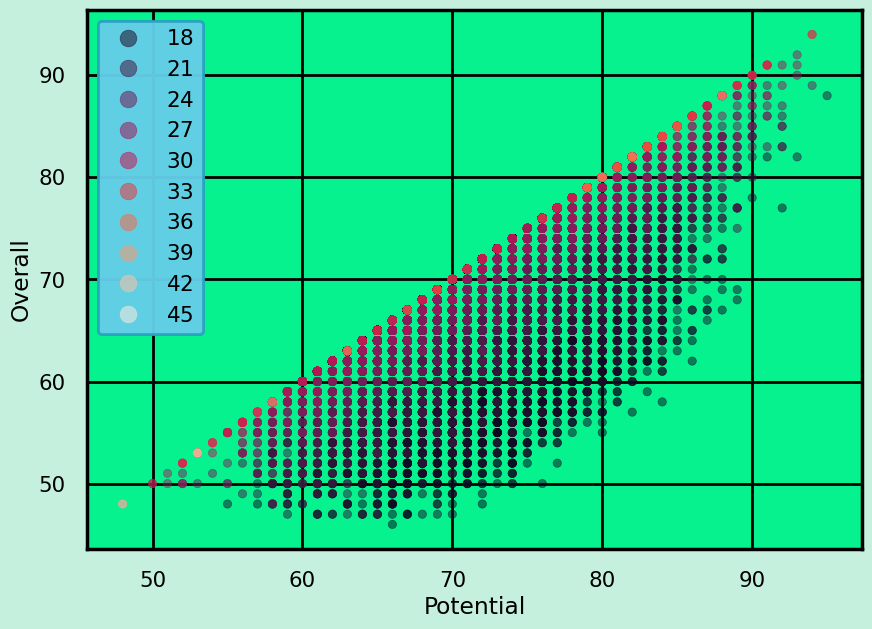

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
c=pd_df_null['Age']
bplotting = ax1.scatter(x=pd_df_null.Potential, y=pd_df_null.Overall, alpha=0.5, linewidths=0.5, marker='.', c=c)
legend1= ax1.legend(*bplotting.legend_elements())
ax1.add_artist(legend1)
plt.xlabel('Potential')
plt.ylabel('Overall')

<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual.</li>
    <p> The younger people have higher potential rating than the overall rating, which mean they can grow. The older they are closer is the values of potential rating and overal rating. As the scope for growth decsreases as they age</p>
    <li>The reason for selecting the chart type you did.</li>
    <p> Scatter plot is used to plot to continous values. So we used scatter plot. We were asked to plot age against potential and overall. So we used Age as label and used color attribute to visually different different age players</p>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    1) The color is used to represent age of different players</br>
    2) The potential rating is always greater than or equal to the overall rating
    <li>Mention the gestalt principles used.(atleast 2)</li>
    1) connectedness - It gives the connection between the Age and (overall vs potential)</br>
    2) similarity - This gives the similarity for the given age.
</ol>

  ### Question 5
<h4>What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual.
<br><br>
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did.</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [ ]:
pd_df_null['Vision'].unique()

array([94.        , 82.        , 87.        , 68.        , 89.        ,
       92.        , 84.        , 63.        , 70.        , 77.        ,
       86.        , 52.        , 79.        , 80.        , 83.        ,
       69.        , 44.        , 50.        , 91.        , 90.        ,
       30.        , 74.        , 72.        , 41.        , 58.        ,
       64.        , 43.        , 76.        , 65.        , 62.        ,
       67.        , 59.        , 85.        , 56.        , 88.        ,
       47.        , 75.        , 93.        , 57.        , 81.        ,
       66.        , 22.        , 53.        , 78.        , 48.        ,
       49.        , 27.        , 73.        , 51.        , 54.        ,
       46.        , 45.        , 42.        , 60.        , 61.        ,
       71.        , 55.        , 23.        , 37.        , 25.        ,
       40.        , 34.        , 32.        , 36.        , 28.        ,
       15.        , 38.        , 33.        , 39.        , 31.  

In [ ]:
pd_df_null['Vision']=pd_df_null['Vision'].astype(int)

In [ ]:
pd_df_null['Value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

In [ ]:
pd_df_null['Value']=pd_df_null['Value'].apply(lambda x: x.replace('€', ''))
pd_df_null['Value_p']=pd_df_null['Value'].apply(lambda x: eval(x[:-1])/1000 if x[-1]=='K' else x[:-1])
pd_df_null['Value_p']=pd.to_numeric(pd_df_null['Value_p'])
indexAge = pd_df_null[pd_df_null['Value_p'].isnull()].index
pd_df_null.drop(indexAge , inplace=True)

In [ ]:
pd_df_null['Value_p']=pd_df_null['Value_p'].astype(int)


In [ ]:
pd_df_null['Value_p'].unique()

array([110,  77, 118,  72, 102,  93,  67,  80,  51,  68,  76,  44,  60,
        63,  89,  83,  78,  58,  53,  38,  64,  27,  81,  69,  59,  62,
        73,  46,  43,  36,  57,  24,  30,   4,  52,  45,  34,  61,  41,
        56,  50,  55,  35,  39,  18,  21,  54,  40,  37,  28,  32,  26,
        33,   9,  15,  22,  14,  42,  31,  25,  29,  16,  23,  19,  20,
        13,  17,  11,   8,   6,  12,   3,   1,  10,   7,   5,   2,   0])

In [ ]:
pd_df_null['Value'].unique()

array(['110.5M', '77M', '118.5M', '72M', '102M', '93M', '67M', '80M',
       '51M', '68M', '76.5M', '44M', '60M', '63M', '89M', '83.5M', '78M',
       '58M', '53.5M', '51.5M', '38M', '64.5M', '27M', '81M', '69.5M',
       '59.5M', '62M', '73.5M', '59M', '46M', '43M', '36M', '57M', '24M',
       '30M', '4M', '64M', '30.5M', '62.5M', '52M', '45M', '34M', '46.5M',
       '61M', '41.5M', '44.5M', '56.5M', '53M', '50M', '55M', '36.5M',
       '45.5M', '43.5M', '35M', '39M', '18M', '21.5M', '50.5M', '54M',
       '40.5M', '37.5M', '28.5M', '37M', '32M', '26M', '33M', '38.5M',
       '35.5M', '9M', '15.5M', '22M', '14M', '42.5M', '31.5M', '42M',
       '25M', '29.5M', '31M', '24.5M', '27.5M', '29M', '16.5M', '23M',
       '19M', '4.2M', '40M', '41M', '28M', '22.5M', '34.5M', '32.5M',
       '20M', '26.5M', '25.5M', '21M', '13M', '17.5M', '11.5M', '8M',
       '6M', '19.5M', '6.5M', '20.5M', '23.5M', '18.5M', '17M', '12.5M',
       '15M', '13.5M', '4.8M', '3M', '1.5M', '16M', '10M', '11M', '7M

Text(0, 0.5, 'Value')

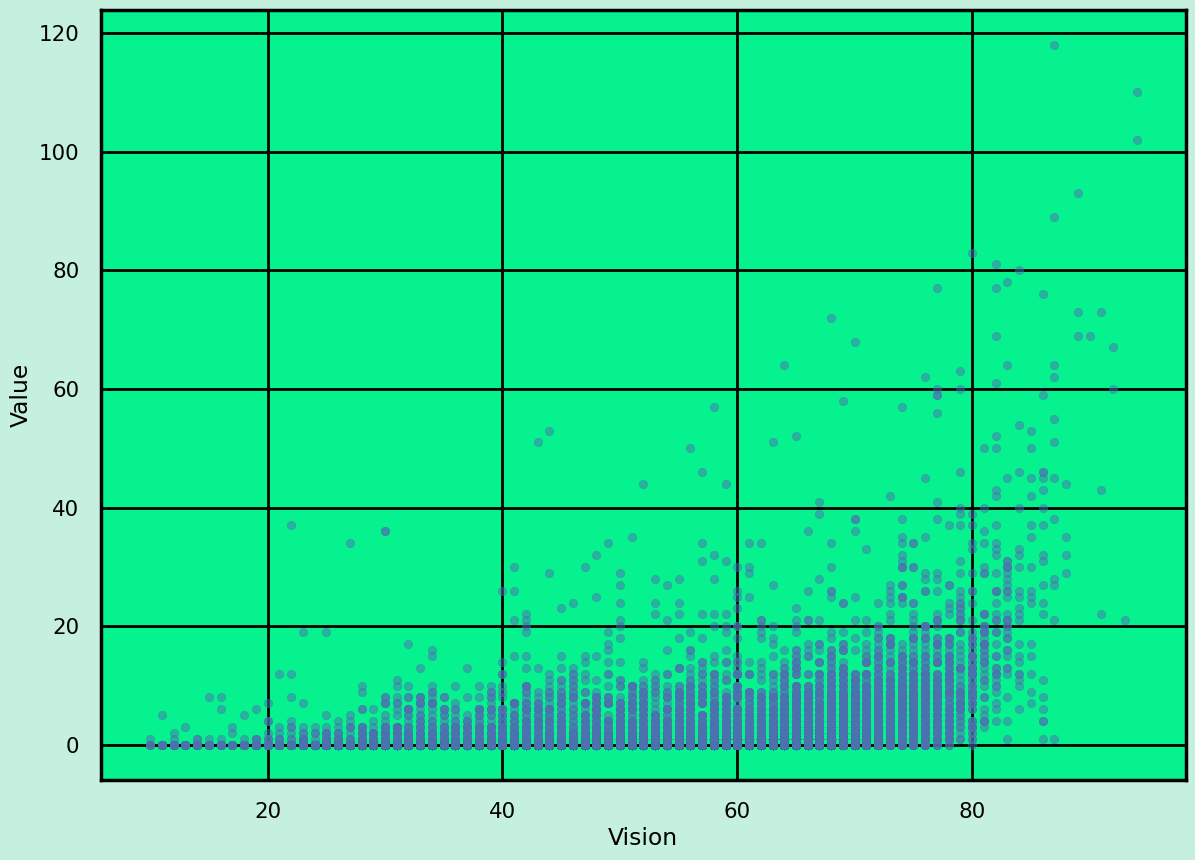

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

bplotting = ax1.scatter(x=pd_df_null.Vision, y=pd_df_null.Value_p, alpha=0.5, linewidths=0.5, marker=".")
plt.xlabel('Vision')
plt.ylabel('Value')

<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <p> The players with higher vision has the probablity of having higher value. Most of the players are valued between 1 million to 20 million. some of the players who have vision greater than 40 are valued above 20 million. Most of the players who have vision greater than 80 are valued above 20million</p>
    <li>The reason for selecting the chart type you did.</li>
    <p> Scatter plot is used to plot to continous values. So we used scatter plot. We were asked to plot vision against value. </p>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    1) The area where there are too many points ahve darker shade and the area where points are far way have lighter shade</br>
    2) used a visualy appealing color and marker for scatter plot to show maximum range of values
    <li>Mention the gestalt principles used.(atleast 2)</li>
    1) connectedness - It gives the connection between the vision and value</br>
    2) proximity - The values are at close proximity.
</ol>

# Group's choice-2 Marks

#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.

 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

In [ ]:
pd_df_null['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [ ]:
pd_df_null['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46])

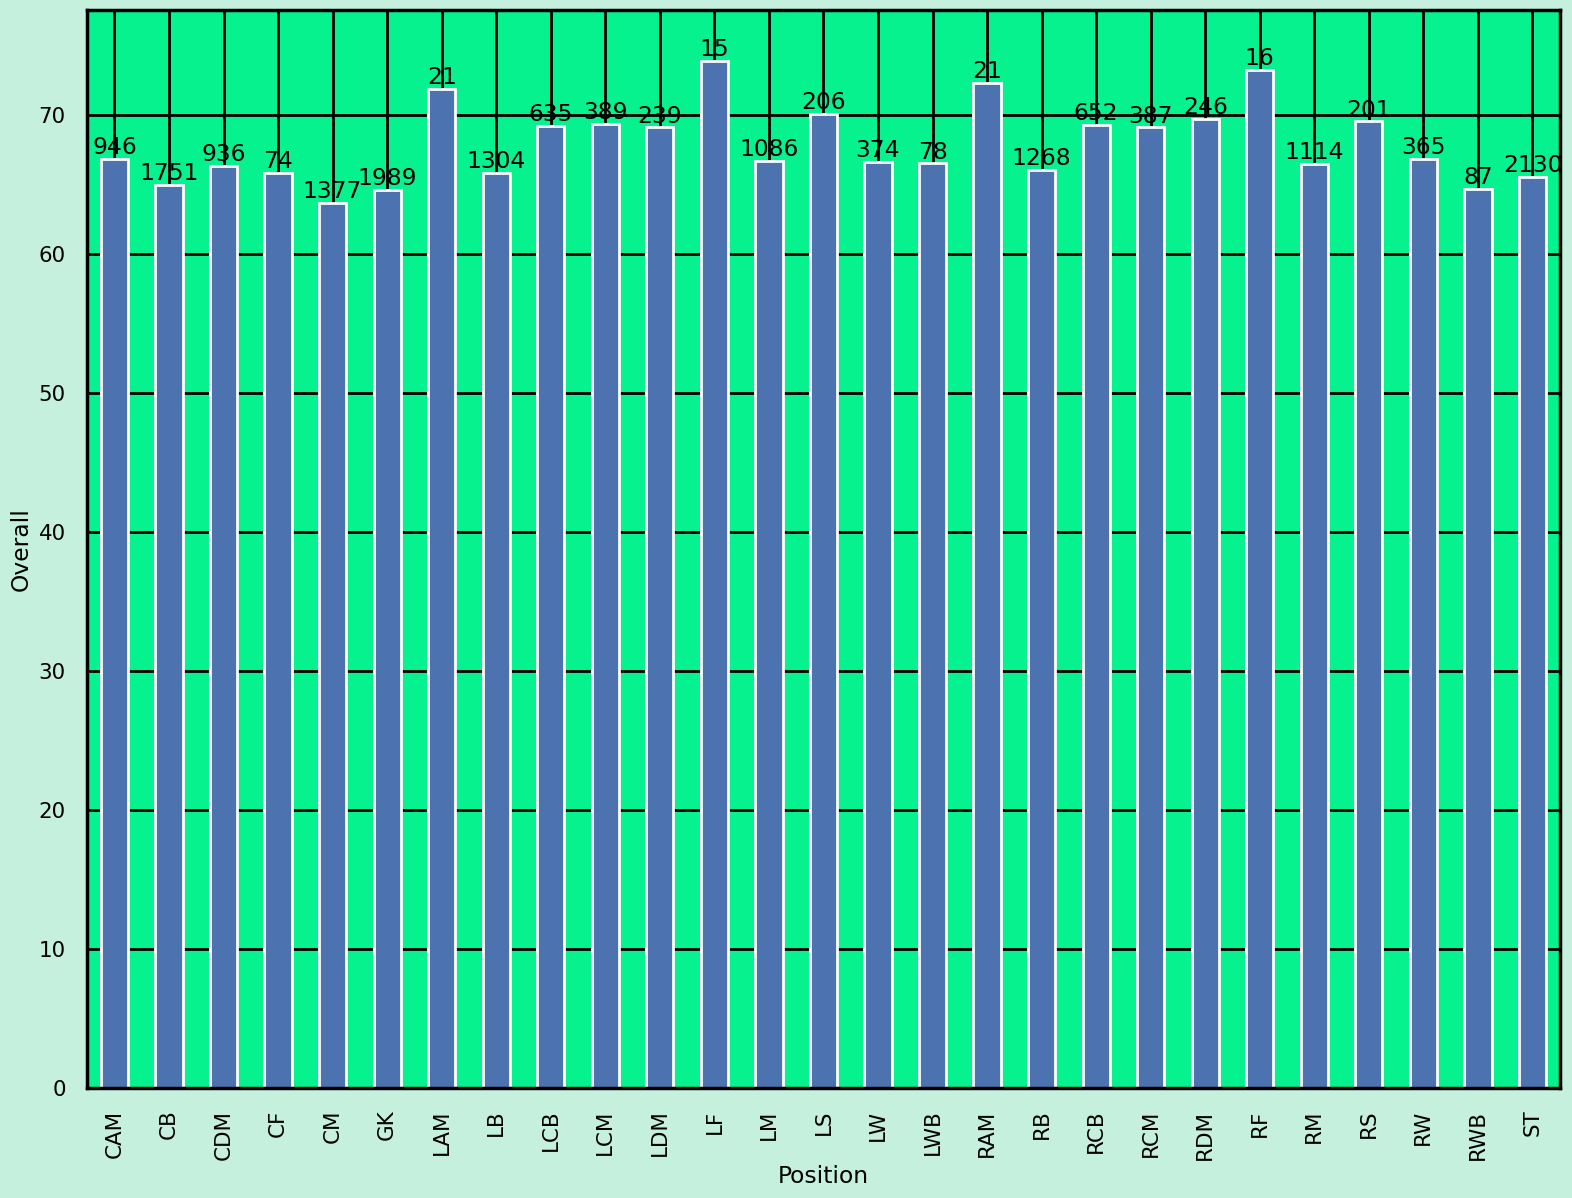

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(19, 14))
g = pd_df_null.groupby(['Position'])['Overall']
s = g.mean()
ax1 = s.plot.bar()
plt.xlabel('Position')
plt.ylabel('Overall')

for x, (y, count) in enumerate(zip(s, g.count())):
    ax1.annotate(f'{count}', (x, y), ha='center', va='bottom')

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   <p> we have used 2 observations to find. One is the postion with ratings and count. Other one is to find the correlation between special and Overall. LAM, RAM, LF and RF are rarest skillset and are heavily rated. </br>
    Special and Overall have a corelation. Players with higher speacial ratings have higher overall rating </p>
   2.The reason for selecting the chart type you did <br>
   <p> for the first used the barplot to find the count and rating asone of the axis is categorical value.</br>
   Second one we used scatter plot to plot, as both are continous values</p>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

Text(0, 0.5, 'Special')

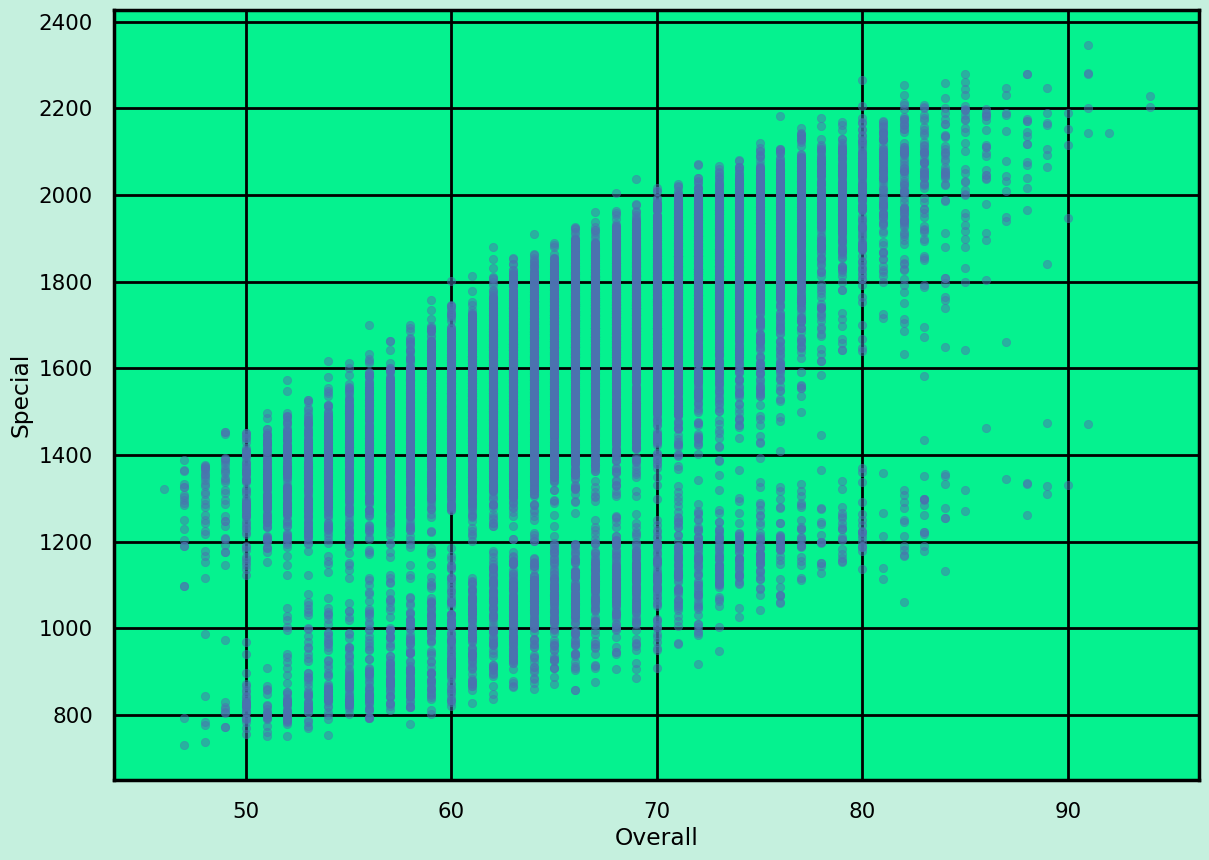

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

bplotting = ax1.scatter(x=pd_df_null.Overall, y=pd_df_null.Special, alpha=0.5, linewidths=0.5, marker=".")
plt.xlabel('Overall')
plt.ylabel('Special')

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   <p> we have used 2 observations to find. One is the postion with ratings and count. Other one is to find the correlation between special and Overall. LAM, RAM, LF and RF are rarest skillset and are heavily rated. </br>
    Special and Overall have a corelation. Players with higher speacial ratings have higher overall rating </p>
   2.The reason for selecting the chart type you did <br>
   <p> for the first used the barplot to find the count and rating asone of the axis is categorical value.</br>
   Second one we used scatter plot to plot, as both are continous values</p>
   Mention the pre-attentive attributes used.(atleast 2)</br>
    1) The area where there are too many points ahve darker shade and the area where points are far way have lighter shade</br>
    2) used a visualy appealing color and marker for scatter plot to show maximum range of values</br>
    Mention the gestalt principles used.(atleast 2)</br>
    1) connectedness - It gives the connection between the vision and value</br>
    2) proximity - The values are at close proximity.

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>